# Machine Learning Algorithms Comparison

In [1]:
import pandas as pd
import numpy as np

In [2]:
#preprocessing and feature selection libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel, SelectKBest, RFE, chi2
from sklearn.ensemble import RandomForestClassifier

In [3]:
# ML and plot libraries
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('data/heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Data Preprocessing

In [6]:
# standarize numerical columns
num_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

StandardScaler = StandardScaler()
df[num_cols] = StandardScaler.fit_transform(df[num_cols])

In [7]:
# Encode labels in Yes/No columns
label_encoder = LabelEncoder()
cat_cols = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
            'DiffWalking', 'Sex','Diabetic', 'PhysicalActivity',
            'Asthma', 'KidneyDisease', 'SkinCancer',
            'AgeCategory', 'Race', 'GenHealth']
for i in cat_cols:
    df[i] = label_encoder.fit_transform(df[i])
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,-1.844750,1,0,0,-0.046751,3.281069,0,0,7,5,2,1,4,-1.460354,1,0,1
1,0,-1.256338,0,0,1,-0.424070,-0.490039,0,0,12,5,0,1,4,-0.067601,0,0,0
2,0,-0.274603,1,0,0,2.091388,3.281069,0,1,9,5,2,1,1,0.628776,1,0,0
3,0,-0.647473,0,0,0,-0.424070,-0.490039,0,0,11,5,0,0,2,-0.763977,0,0,1
4,0,-0.726138,0,0,0,3.097572,-0.490039,1,0,4,5,0,1,4,0.628776,0,0,0


In [8]:
# split data into training and testing set
# 30% testing, 70% training
features = df.drop(columns=['HeartDisease'], axis=1)
label = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(features, label,
                                                    shuffle=True, test_size=.3)

In [9]:
# check shapes of training and testing sets
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (223856, 17)
Shape of testing feature: (95939, 17)
Shape of training label: (223856,)
Shape of training label: (95939,)


## Features Selection

In [10]:
feature_name = list(X_train.columns)
max_feats = len(feature_name) # maximum number of features that could be chosen
max_feats

17

In [11]:
X_norm = MinMaxScaler().fit_transform(X_train)

### Embedded Method

In [12]:
# Random Forest to select features based on their importance
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), 
                                      max_features=max_feats)
embeded_rf_selector.fit(X_train, y_train)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_train.loc[:, embeded_rf_support].columns.tolist()
embeded_rf_feature

['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'SleepTime']

In [13]:
embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"),
                                      max_features=max_feats)
embeded_lr_selector.fit(X_norm, y_train)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X_train.loc[:, embeded_lr_support].columns.tolist()
embeded_lr_feature

['BMI', 'Stroke', 'Sex', 'AgeCategory', 'Diabetic', 'SleepTime']

### Filter Method

In [14]:
# Chi Squared for Feature Selection
chi_selector = SelectKBest(chi2, k=max_feats)
chi_selector.fit(X_norm, y_train)
chi_support = chi_selector.get_support()
chi_feature = X_train.loc[:,chi_support].columns.tolist()
chi_feature

['BMI',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'PhysicalHealth',
 'MentalHealth',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'SleepTime',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [15]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature


cor_support, cor_feature = cor_selector(X_train, y_train, max_feats)
cor_feature

['SleepTime',
 'GenHealth',
 'MentalHealth',
 'AlcoholDrinking',
 'Race',
 'Asthma',
 'BMI',
 'Sex',
 'SkinCancer',
 'PhysicalActivity',
 'Smoking',
 'KidneyDisease',
 'PhysicalHealth',
 'Diabetic',
 'Stroke',
 'DiffWalking',
 'AgeCategory']

### Wrapper Method 

In [16]:
rfe_selector = RFE(estimator=LogisticRegression(),
                   n_features_to_select=max_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y_train)
rfe_support = rfe_selector.get_support()
rfe_feature = X_train.loc[:, rfe_support].columns.tolist()
rfe_feature

['BMI',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'PhysicalHealth',
 'MentalHealth',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'SleepTime',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

### Selected Features

In [17]:
feature_selection_df = pd.DataFrame({'Feature': feature_name,
                                     'Random Forest': embeded_rf_support,
                                     'Logistic': embeded_lr_support,
                                     'Chi-2': chi_support,
                                     'Pearson': cor_support,
                                     'RFE': rfe_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
feature_selection_df = feature_selection_df.sort_values(
                                    ['Total', 'Feature'], ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(max_feats)

,Feature,Random Forest,Logistic,Chi-2,Pearson,RFE,Total
1,SleepTime,True,True,True,True,True,5
2,BMI,True,True,True,True,True,5
3,AgeCategory,True,True,True,True,True,5
4,Stroke,False,True,True,True,True,4
5,Sex,False,True,True,True,True,4
6,PhysicalHealth,True,False,True,True,True,4
7,MentalHealth,True,False,True,True,True,4
8,Diabetic,False,True,True,True,True,4
9,Smoking,False,False,True,True,True,3
10,SkinCancer,False,False,True,True,True,3


In [18]:
features = feature_selection_df[feature_selection_df['Total'] > 4]['Feature']

In [19]:
X_train = X_train[features]
X_test = X_test[features]

## Models 

In [20]:
def evaluate_model(model, x_test, y_test):
    # Predict Test Data
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

### Decision Tree 

In [21]:
clf = DecisionTreeClassifier()

# Train
clf.fit(X_train, y_train)

# Store all of the revelant evaluation metrics
clf_result = evaluate_model(clf, X_test, y_test)

# Some of the evaluation metrics
print('Accuracy:', clf_result['acc'])
print('Precision:', clf_result['prec'])
print('Recall:', clf_result['rec'])
print('F1 Score:', clf_result['f1'])
print('Cohens Kappa Score:', clf_result['kappa'])
print('Area Under Curve:', clf_result['auc'])
print('Confusion Matrix:\n', clf_result['cm'])

Accuracy: 0.8970283200783832
Precision: 0.19692423105776444
Recall: 0.06353624591552705
F1 Score: 0.0960746637386769
Cohens Kappa Score: 0.05642602948812192
Area Under Curve: 0.6136761461865662
Confusion Matrix:
 [[85535  2141]
 [ 7738   525]]


### Naive Bayes Classifier

In [22]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_result = evaluate_model(gnb, X_test, y_test)

print("Accuracy:", gnb_result['acc'])
print('Precision:', gnb_result['prec'])
print('Recall:', gnb_result['rec'])
print('F1 Score:', gnb_result['f1'])
print('Cohens Kappa Score:', gnb_result['kappa'])
print('Area Under Curve:', gnb_result['auc'])
print('Confusion Matrix:\n', gnb_result['cm'])

Accuracy: 0.9082854730610075
Precision: 0.23038229376257546
Recall: 0.02771390536124894
F1 Score: 0.04947607216160743
Cohens Kappa Score: 0.031563421073239395
Area Under Curve: 0.7655724122718515
Confusion Matrix:
 [[86911   765]
 [ 8034   229]]


### Logistic Regression

In [23]:
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train, y_train)
logreg_result = evaluate_model(logreg, X_test, y_test)

print("Accuracy:", logreg_result['acc'])
print('Precision:', logreg_result['prec'])
print('Recall:', logreg_result['rec'])
print('F1 Score:', logreg_result['f1'])
print('Cohens Kappa Score:', logreg_result['kappa'])
print('Area Under Curve:', logreg_result['auc'])
print('Confusion Matrix:\n', logreg_result['cm'])

Accuracy: 0.9137993933645338
Precision: 0.18181818181818182
Recall: 0.00024204284158296018
F1 Score: 0.00048344210780759
Cohens Kappa Score: 0.00025449287597612
Area Under Curve: 0.7612999831539552
Confusion Matrix:
 [[87667     9]
 [ 8261     2]]


### Gradient Boosting Classifier

In [24]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_result = evaluate_model(gbc, X_test, y_test)

print("Accuracy:", gbc_result['acc'])
print('Precision:', gbc_result['prec'])
print('Recall:', gbc_result['rec'])
print('F1 Score:', gbc_result['f1'])
print('Cohens Kappa Score:', gbc_result['kappa'])
print('Area Under Curve:', gbc_result['auc'])
print('Confusion Matrix:\n', gbc_result['cm'])

Accuracy: 0.9138515098135274
Precision: 0.25
Recall: 0.00012102142079148009
F1 Score: 0.00024192572880125804
Cohens Kappa Score: 0.00015859297508891146
Area Under Curve: 0.7719931489806264
Confusion Matrix:
 [[87673     3]
 [ 8262     1]]


## Comparison 

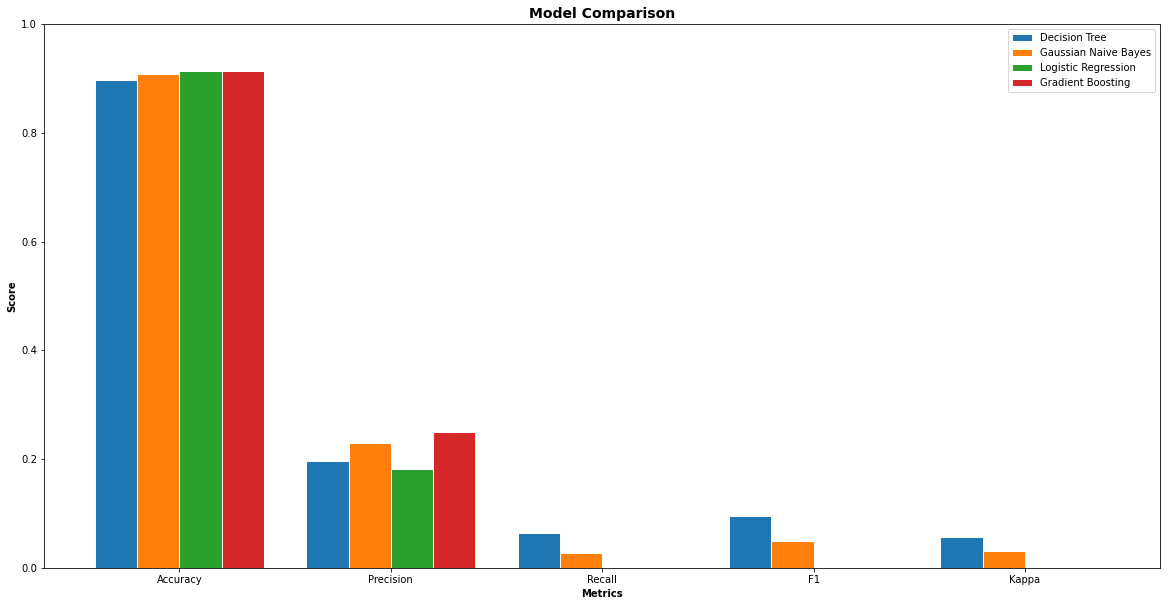

In [25]:
# Intitialize figure with two plots
fig = plt.figure(figsize=(20, 10))
plt.title('Model Comparison', fontsize=14, fontweight='bold')

# first plot
barWidth = 0.2
clf_score = [clf_result['acc'], clf_result['prec'], clf_result['rec'],
             clf_result['f1'], clf_result['kappa']]
gnb_score = [gnb_result['acc'], gnb_result['prec'], gnb_result['rec'],
             gnb_result['f1'], gnb_result['kappa']]
logreg_score = [logreg_result['acc'], logreg_result['prec'],
                logreg_result['rec'], logreg_result['f1'], logreg_result['kappa']]
gbc_score = [gbc_result['acc'], gbc_result['prec'], gbc_result['rec'],
             gbc_result['f1'], gbc_result['kappa']]

# Set position of bar on X axis
br1 = np.arange(len(clf_score))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

# Make the plot

plt.bar(br1, clf_score, width=barWidth, edgecolor='white', 
        label='Decision Tree')
plt.bar(br2, gnb_score, width=barWidth, edgecolor='white',
        label='Gaussian Naive Bayes')
plt.bar(br3, logreg_score, width=barWidth, edgecolor='white',
        label='Logistic Regression')
plt.bar(br4, gbc_score, width=barWidth, edgecolor='white',
        label='Gradient Boosting')

# Configure x and y axis
plt.xlabel('Metrics', fontweight='bold')
plt.xticks([r + (barWidth*1.5) for r in range(len(clf_score))],
           ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa'])
plt.ylabel('Score', fontweight='bold')
plt.ylim(0, 1)
plt.legend()
plt.savefig('figures/model_comparison.png')


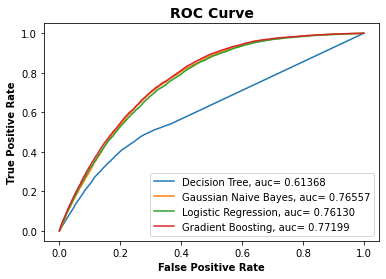

In [26]:
# Comparing ROC Curve
plt.plot(clf_result['fpr'], clf_result['tpr'],
         label='Decision Tree, auc={: 0.5f}'.format(clf_result['auc']))
plt.plot(gnb_result['fpr'], gnb_result['tpr'],
         label='Gaussian Naive Bayes, auc={: 0.5f}'.format(gnb_result['auc']))
plt.plot(logreg_result['fpr'], logreg_result['tpr'],
         label='Logistic Regression, auc={: 0.5f}'.format(logreg_result['auc']))
plt.plot(gbc_result['fpr'], gbc_result['tpr'],
         label='Gradient Boosting, auc={: 0.5f}'.format(gbc_result['auc']))

# Configure x and y axis
plt.xlabel('False Positive Rate', fontweight='bold')
plt.ylabel('True Positive Rate', fontweight='bold')

# Create legend & title
plt.title('ROC Curve', fontsize=14, fontweight='bold')
plt.legend()
plt.savefig('figures/roc_curve.png')
plt.show()